In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        Nehra\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [7]:
import pandas as pd

In [13]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep="\t") # UCI datasets (SMSSpamCollection)
messages.head()

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [16]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [21]:
messages.groupby('label').describe().transpose() # features that separate ham and spam

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [22]:
messages['length'] = messages['message'].apply(len) # making a new column to detect how long the text messages are

In [23]:
messages.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

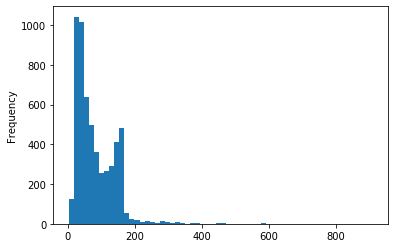

In [25]:
messages['length'].plot.hist(bins=60) #distribution of message length

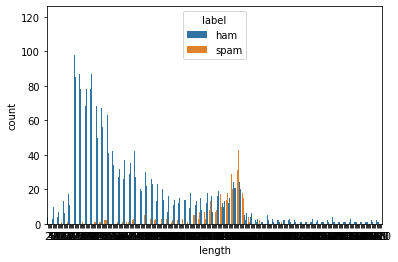

In [26]:
sns.countplot(x='length',data=messages,hue='label')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BC780C0C8>,
      dtype=object)

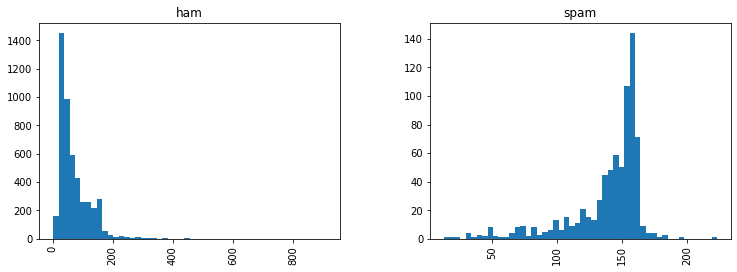

In [27]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

 our data is all in text format (strings).The classification algorithms will need some sort of numerical feature vector in order to perform the classification task.There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number. 
 
  We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library.

In [32]:
import string
from nltk.corpus import stopwords # removing stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [33]:
'''
 Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
'''




def text_process(mess):
   
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [34]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

We'll do that in three steps using the bag-of-words model:

1) Count how many times does a word occur in each message (Known as term frequency)

2) Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3) Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

I will first use SciKit Learn's CountVectorizer. This model will convert a collection of text documents to a matrix of token counts.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


Now I used .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages

In [38]:
messages_bow = bow_transformer.transform(messages['message'])

In [39]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [40]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


After the counting, the term weighting and normalization can be done with TF-IDF, using scikit-learn's TfidfTransformer.

TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)


TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).


In [43]:
messages_tfidf = tfidf_transformer.transform(messages_bow)   #transforming the entire bag-of-words corpus into TF-IDF corpus at once
print(messages_tfidf.shape)

(5572, 11425)


choosing the Naive Bayes classifier:

In [45]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [46]:
all_predictions = spam_detect_model.predict(messages_tfidf)  #Model Evaluation over the entire data sets
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [47]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In the abovevaluation, we evaluated accuracy on the same data we used for training.

A proper way is to split the data into a training/test set, where the model only ever sees the training data during its model fitting and parameter tuning. The test data is never used in any way. This is then our final evaluation on test data is representative of true predictive performance.

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [51]:
print(len(X_train), len(X_test), len(X_train) + len(X_test))

3900 1672 5572


I now created a pipeline of workflow using scikit-learn pipeline.This will allow us to set up all the transformations that we will do to the data for future use.

In [52]:
from sklearn.pipeline import Pipeline # it accept data in sort of dictionary format.

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts, bow stands for 'bag of words'
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores 
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors using Naive Bayes classifier
])

In [53]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000021BC9398168>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [54]:
predictions = pipeline.predict(X_test)

In [56]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1509
        spam       0.70      1.00      0.82       163

    accuracy                           0.96      1672
   macro avg       0.85      0.98      0.90      1672
weighted avg       0.97      0.96      0.96      1672



Now we have a classification report for our model on a true testing set